In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import datetime as dt 

In [3]:
tweets = pd.read_csv('trump_tweets_raw_all.csv')

In [4]:
tweets = tweets.dropna(subset= ['created_at'])

In [5]:
tweets['created_at'] = tweets['created_at'].apply( lambda x: pd.to_datetime(x) )

In [6]:
tweets = tweets.set_index('created_at')

In [7]:
tweets.index.normalize()

DatetimeIndex(['2020-05-03', '2020-05-03', '2020-05-03', '2020-05-03',
               '2020-05-03', '2020-05-03', '2020-05-03', '2020-05-03',
               '2020-05-03', '2020-05-03',
               ...
               '2017-01-03', '2017-01-02', '2017-01-02', '2017-01-02',
               '2017-01-02', '2017-01-02', '2017-01-02', '2017-01-02',
               '2017-01-01', '2016-12-31'],
              dtype='datetime64[ns]', name='created_at', length=13970, freq=None)

In [8]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

In [9]:
daily_tweets = tweets.groupby(tweets.index.normalize())['id_str'].count()
# daily_tweets.columns=['daily_count']
daily_tweets.index.name='date'

In [10]:
all_dates = pd.date_range(start = '2017-01-01', end = '2020-05-03' )

In [11]:
daily_tweets = daily_tweets.reindex(all_dates,fill_value=0)

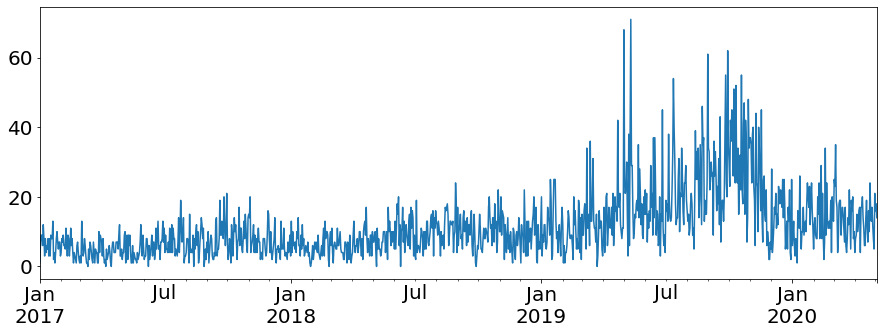

In [12]:
daily_tweets[daily_tweets.index].plot()

In [13]:
weekly_tweets = daily_tweets.resample('W').sum()

In [14]:
daily_tweets = daily_tweets.to_frame(name='daily_count')
weekly_tweets = weekly_tweets.to_frame(name='weekly_count')

daily_tweets.index.name = 'date'
weekly_tweets.index.name = 'date'

daily_tweets.to_csv('trump_daily_tweets.csv')
weekly_tweets.to_csv('trump_weekly_tweets.csv')

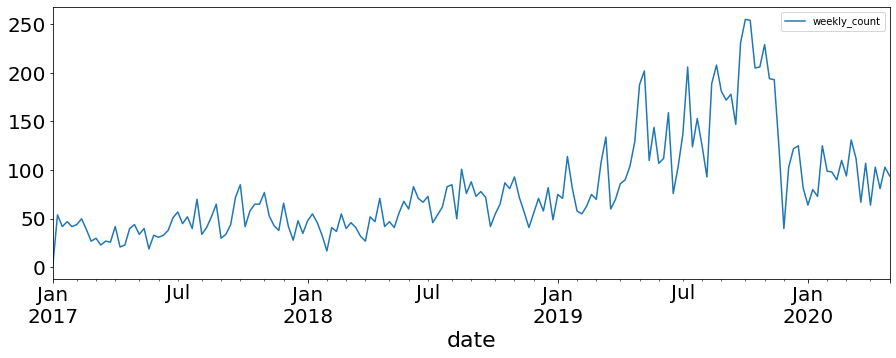

In [15]:
weekly_tweets.plot()